In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis, qso_catalogs_report
from utils_plotting import plot_class_histograms

In [3]:
sns.set(style='ticks')

# KIDS magnitudes

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 44)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing R > 22: 33587 left


In [5]:
catalog = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-10_16:21:34.csv')
catalog.shape

(2692201, 18)

In [6]:
catalog['train'] = catalog['ID'].isin(kids_x_sdss['ID'])

In [7]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_catalog = catalog.loc[catalog['CLASS'] == 'QSO']

In [8]:
catalog_sampled = catalog.sample(n=500000, random_state=1567)
qso_catalog_sampled = qso_catalog.sample(n=100000, random_state=1567)

In [9]:
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]
catalog_south = catalog.loc[catalog['DECJ2000'] < -15]

In [10]:
kids_x_sdss_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5]
kids_x_sdss_non_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] <= 0.5]

catalog_star = catalog.loc[catalog['CLASS_STAR'] >= 0.5]
catalog_non_star = catalog.loc[catalog['CLASS_STAR'] <= 0.5]

In [11]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([17107,  6084, 10396]),
 array([50.93339685, 18.11415131, 30.95245184]))

In [12]:
describe_column(catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1536462,  165065,  990674]),
 array([57.07085021,  6.13122869, 36.79792111]))

In [13]:
describe_column(catalog_north['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([990457, 110737, 718715]),
 array([54.42343546,  6.08475479, 39.49180976]))

In [14]:
describe_column(catalog_south['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([546005,  54328, 271959]),
 array([62.59429182,  6.22818964, 31.17751854]))

In [15]:
describe_column(catalog_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([ 10568, 149271, 987271]),
 array([ 0.92127172, 13.01278866, 86.06593962]))

In [16]:
describe_column(catalog_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1525894,   15794,    3403]),
 array([98.75754891,  1.02220516,  0.22024593]))

# Photo catalogs

In [17]:
qso_catalogs_report(catalog)

Catalog size: 2692201
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1536462,  165065,  990674]), array([57.07085021,  6.13122869, 36.79792111]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 15005, train elements: 3035
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  747, 12921,  1337]), array([ 4.97834055, 86.11129623,  8.91036321]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 15990, train elements: 3430
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  443, 14580,   967]), array([ 2.77048155, 91.18198874,  6.04752971]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 37377, train elements: 5899
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 3473, 28563,  5341]), array([ 9.29181047, 76.41865318, 14.28953635]))


# Standalone bands

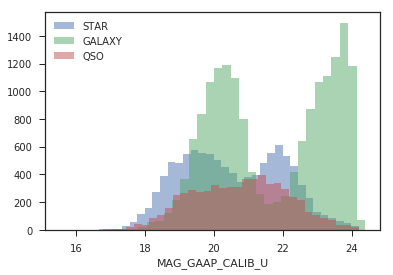

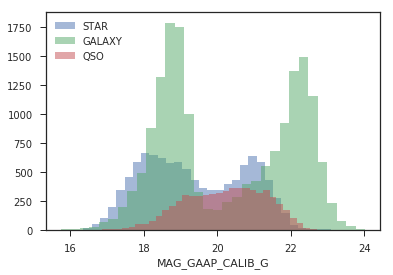

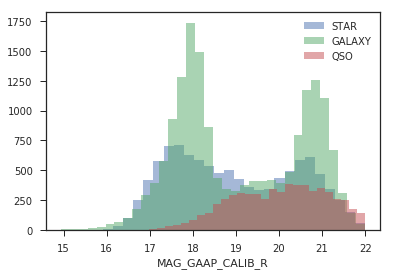

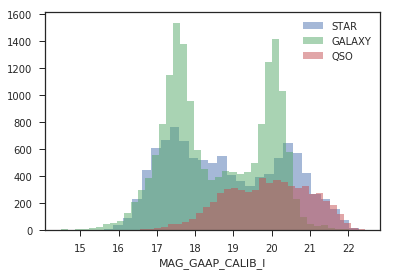

In [18]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

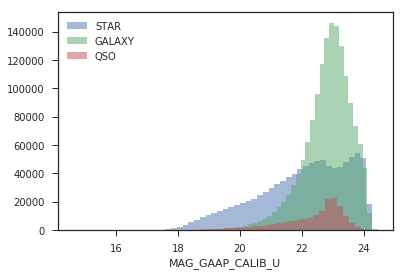

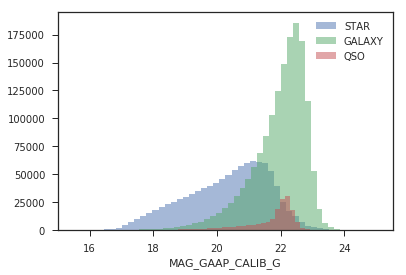

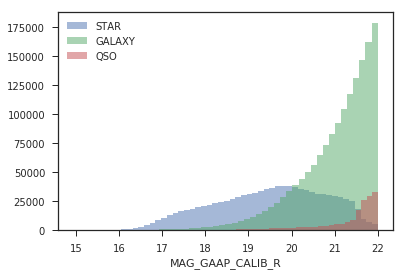

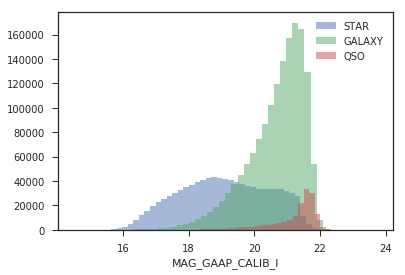

In [19]:
plot_class_histograms(catalog, BAND_CALIB_COLUMNS)

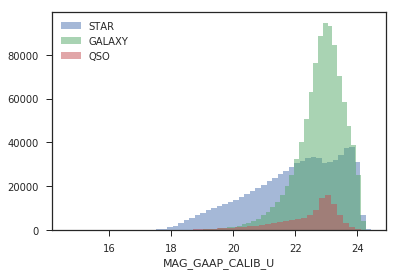

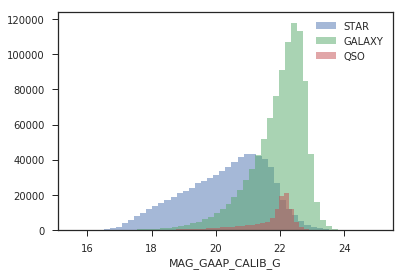

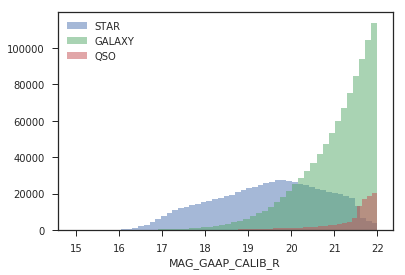

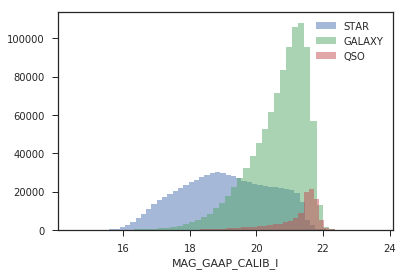

In [20]:
plot_class_histograms(catalog_north, BAND_CALIB_COLUMNS)

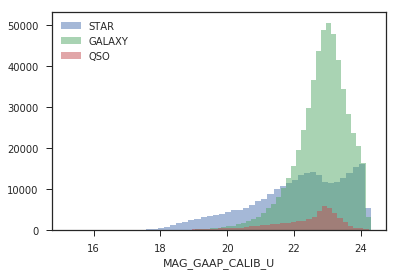

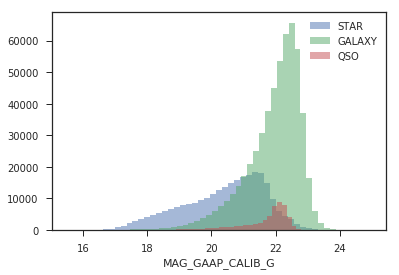

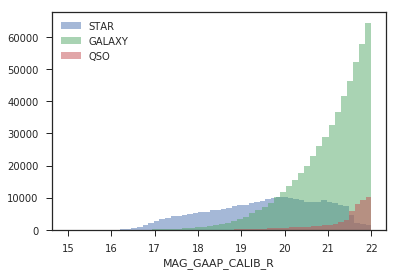

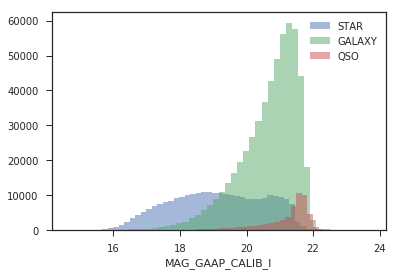

In [21]:
plot_class_histograms(catalog_south, BAND_CALIB_COLUMNS)

# Paired bands

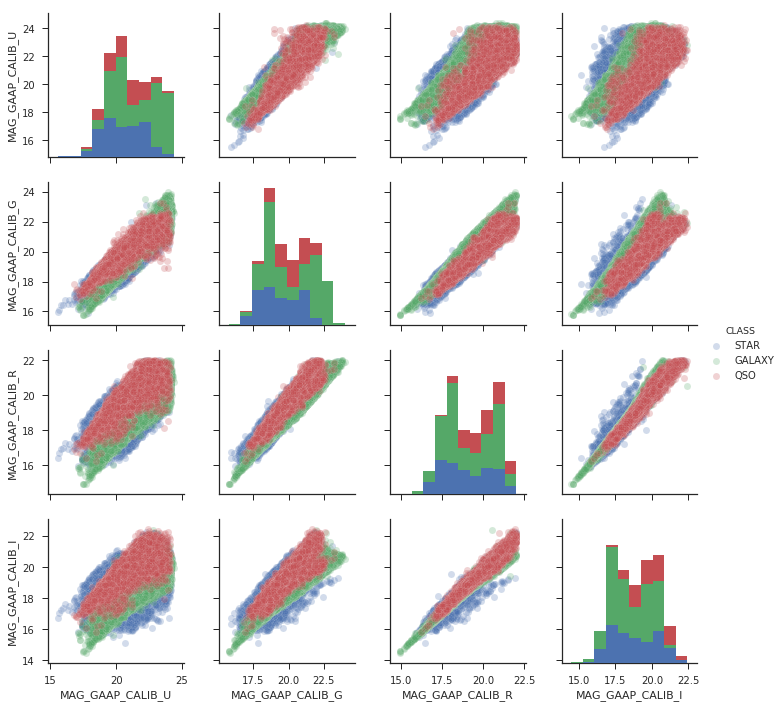

In [22]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

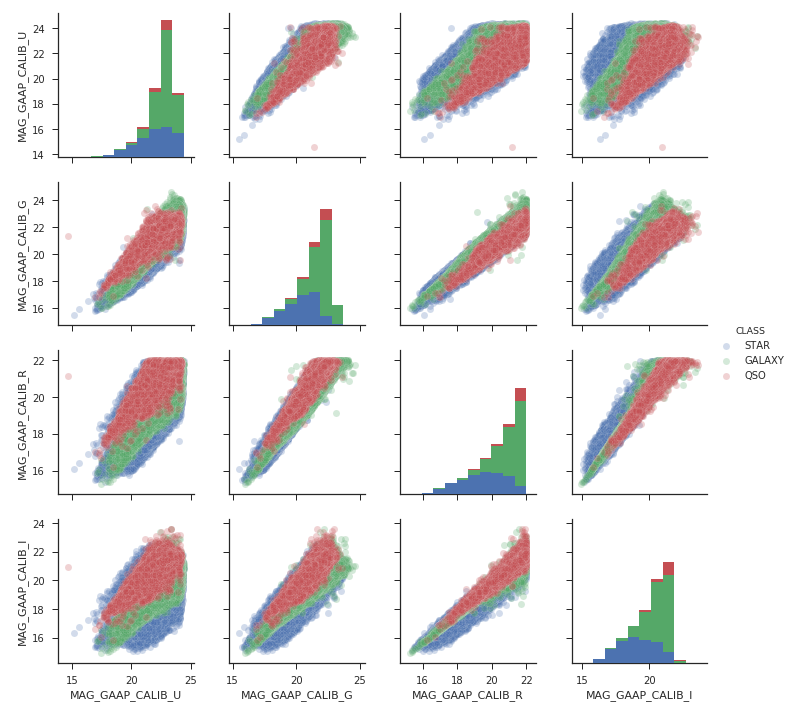

In [23]:
sns.pairplot(catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

# Standalone colors

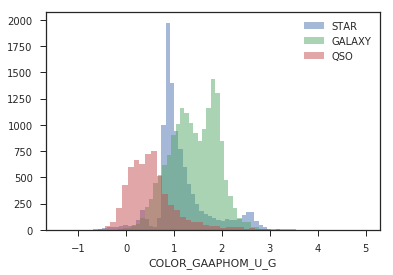

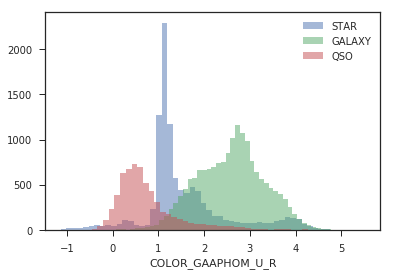

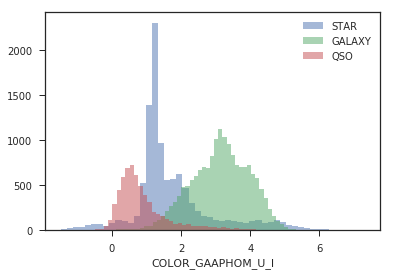

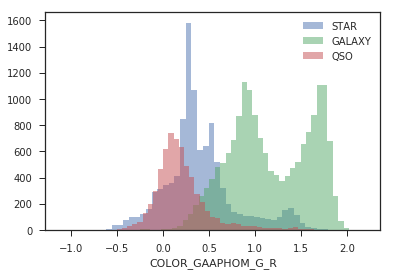

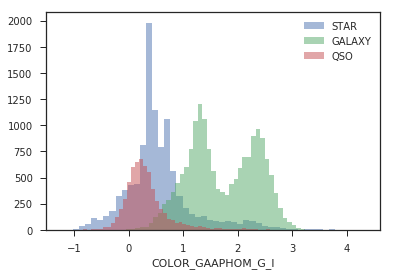

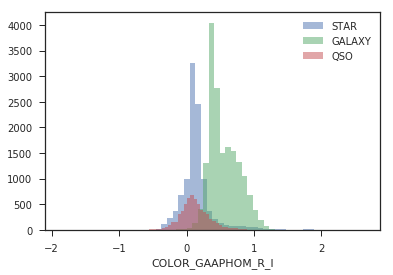

In [24]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

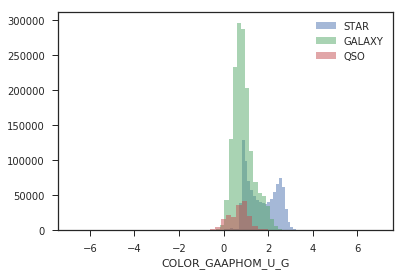

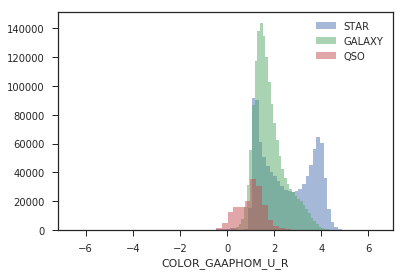

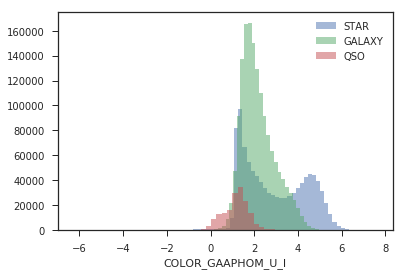

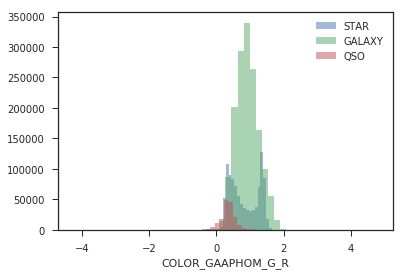

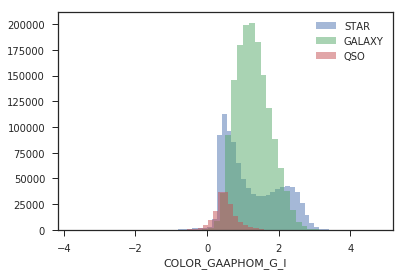

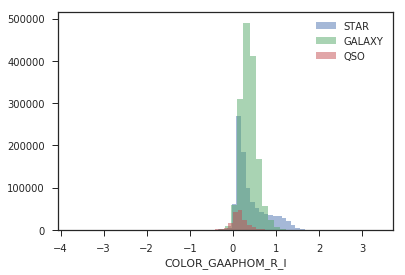

In [25]:
plot_class_histograms(catalog, COLOR_COLUMNS)

# Paired colors

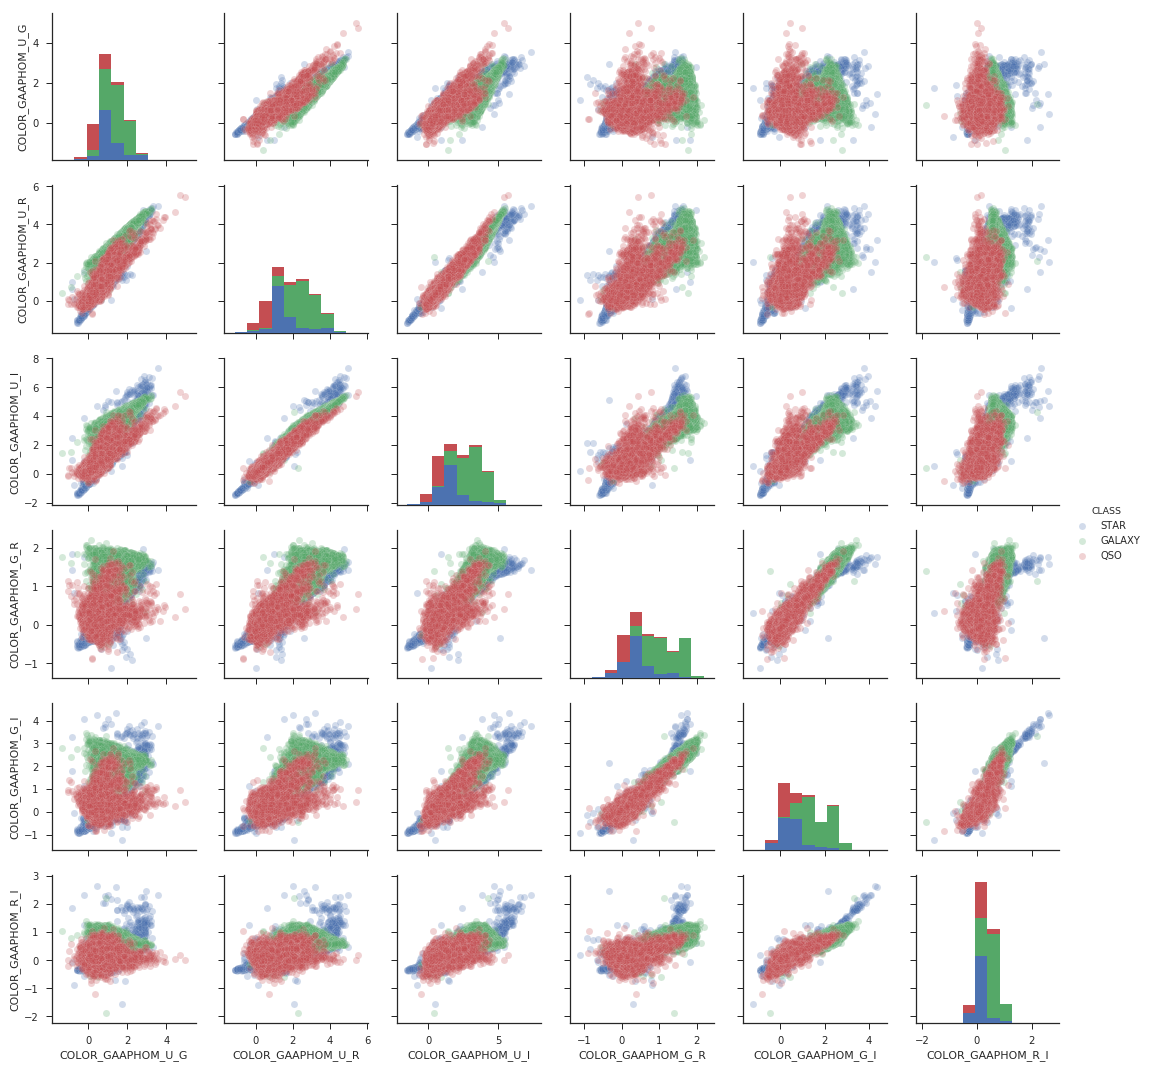

In [26]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

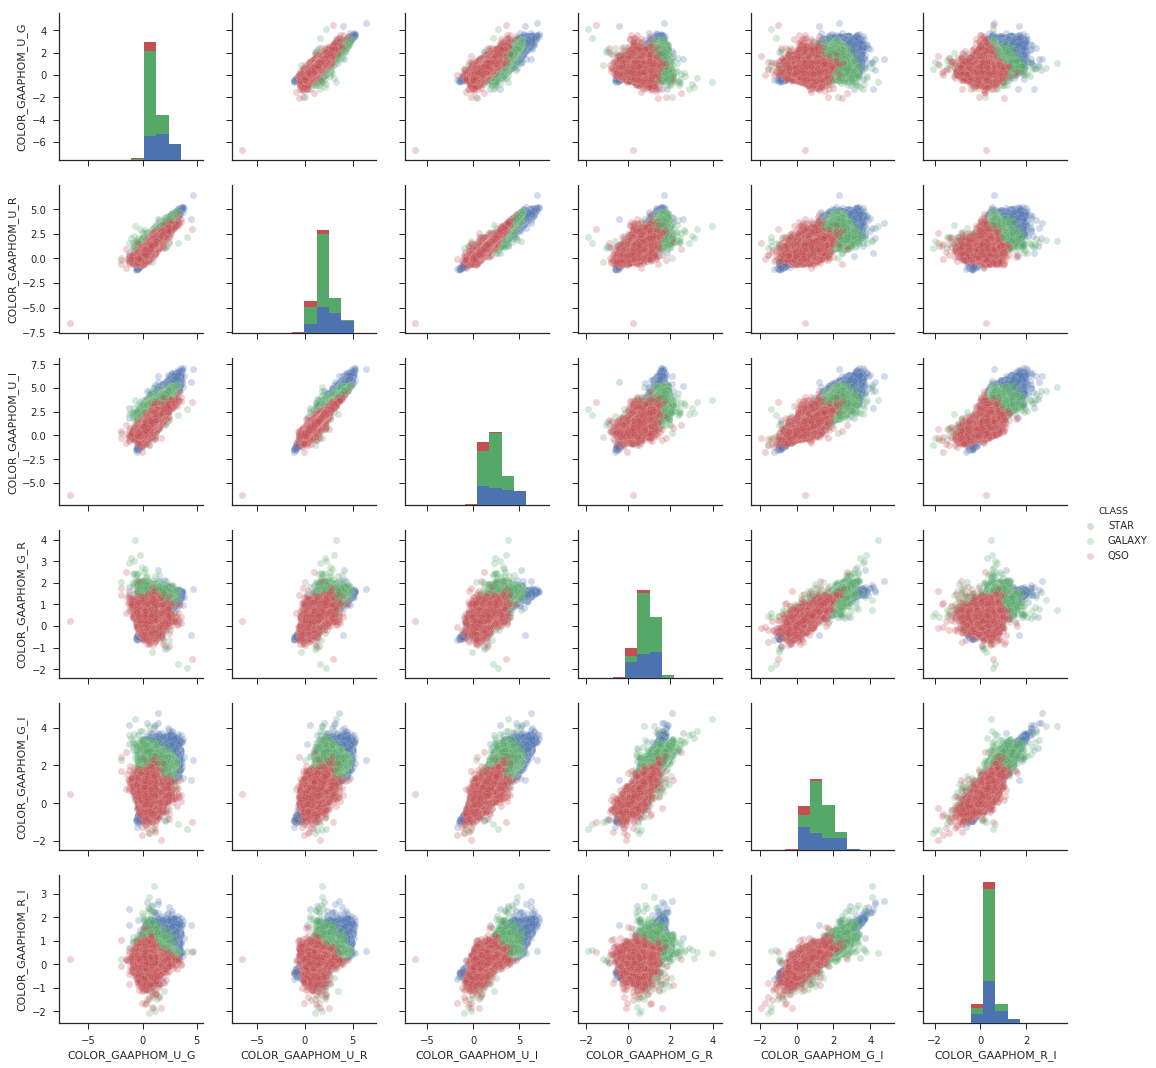

In [27]:
sns.pairplot(catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

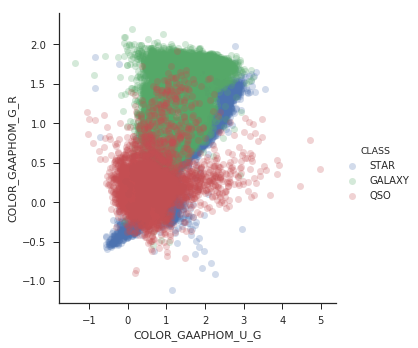

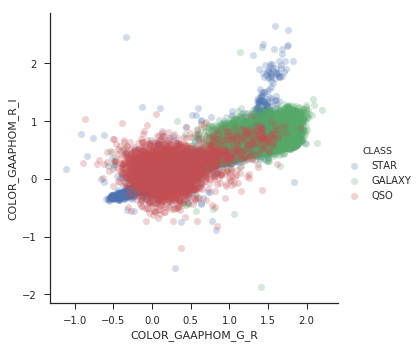

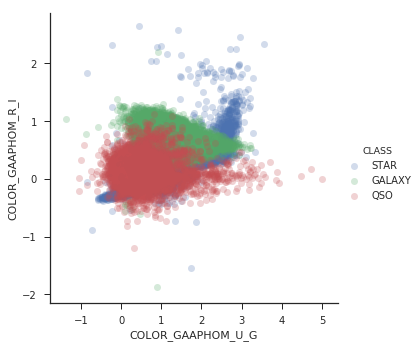

In [28]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

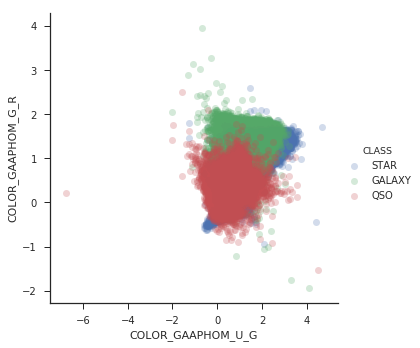

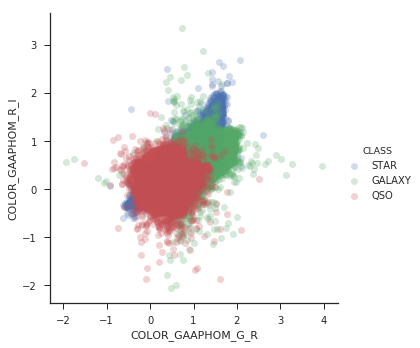

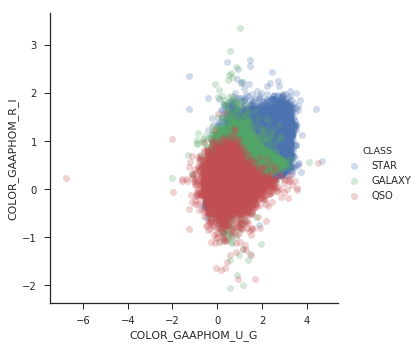

In [29]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_sampled, fit_reg=False, scatter_kws={'alpha': 0.25})

# QSO color pairs

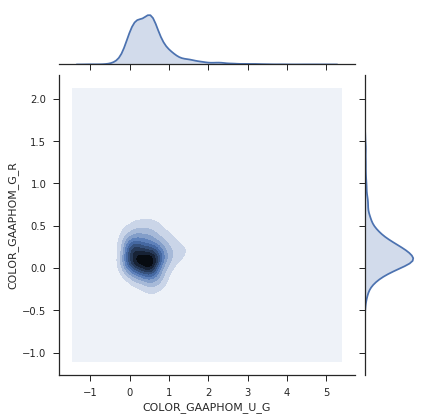

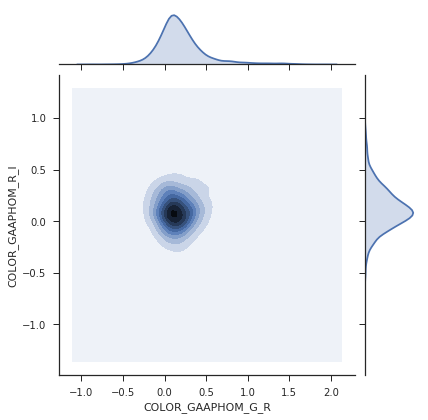

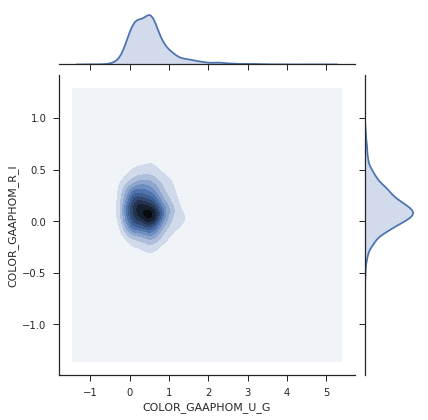

In [30]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

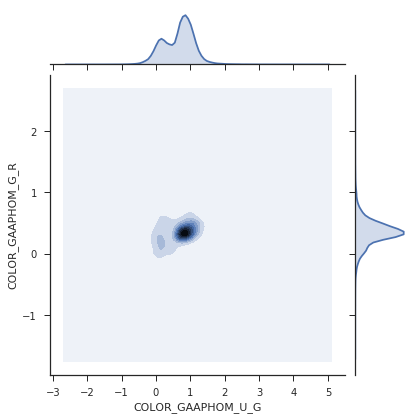

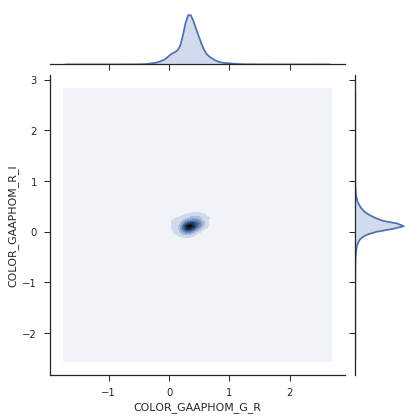

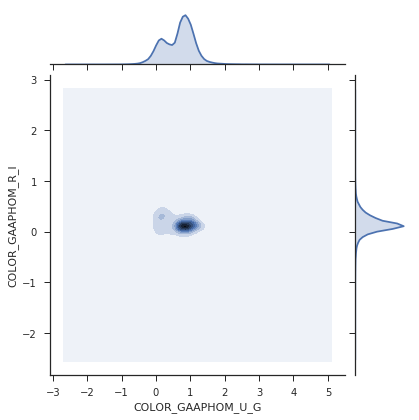

In [31]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_catalog_sampled[b_1], qso_catalog_sampled[b_2], kind='kde', stat_func=None)

# Number counts analysis

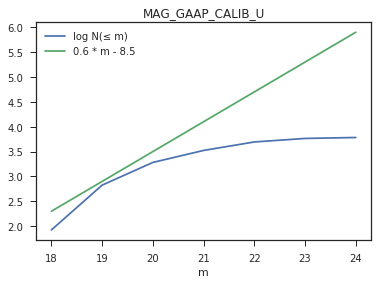

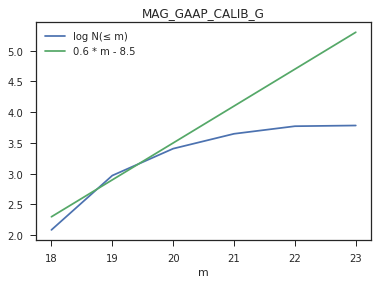

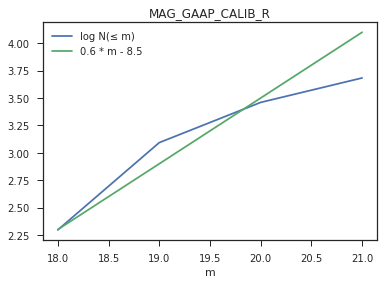

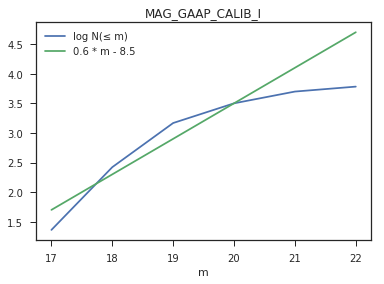

In [32]:
number_count_analysis(qso_kids_sdss, c=8.5)

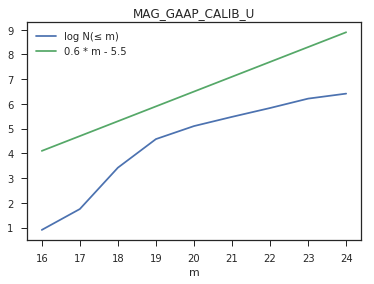

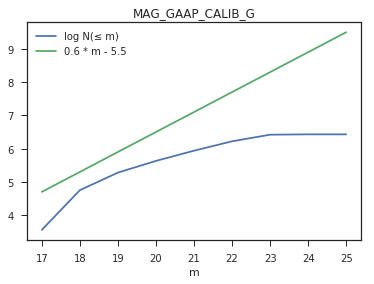

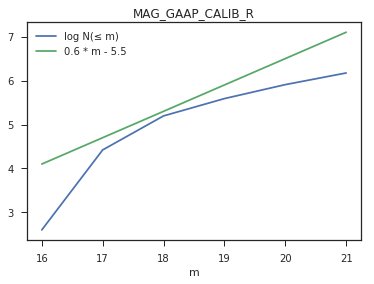

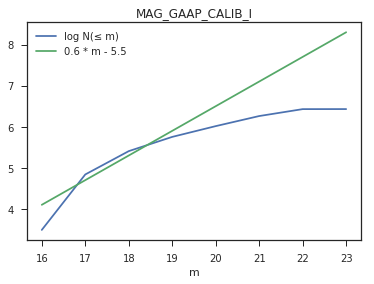

In [33]:
number_count_analysis(catalog, c=5.5)

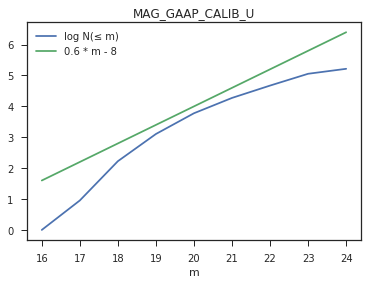

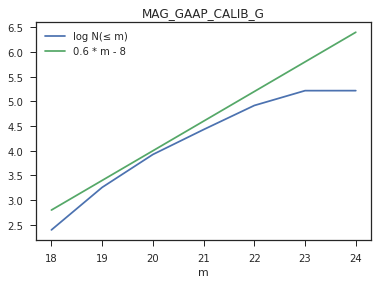

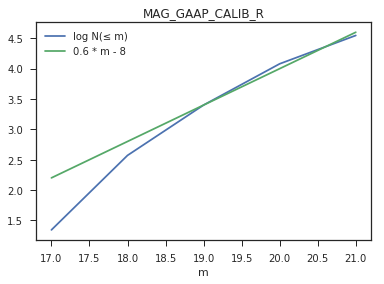

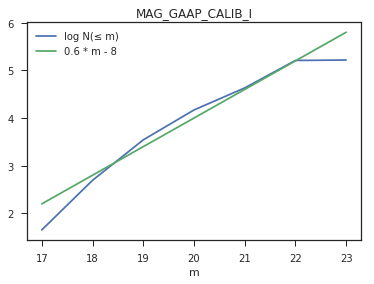

In [34]:
number_count_analysis(qso_catalog, c=8)

# Predictions

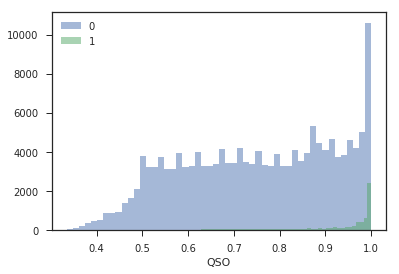

In [35]:
for t in [0, 1]:
    sns.distplot(qso_catalog.loc[qso_catalog['train'] == t]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

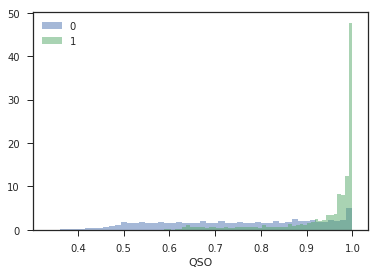

In [36]:
for t in [0, 1]:
    sns.distplot(qso_catalog.loc[qso_catalog['train'] == t]['QSO'], label=str(t), norm_hist=True, kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

# CLASS_STAR

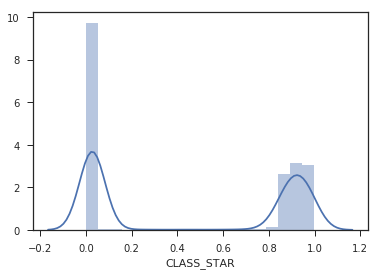

In [17]:
sns.distplot(kids_x_sdss['CLASS_STAR'])

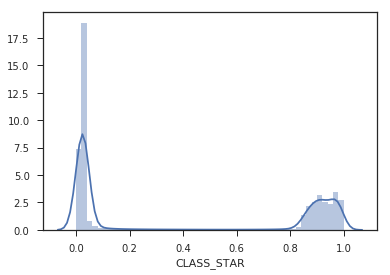

In [37]:
sns.distplot(catalog['CLASS_STAR'])

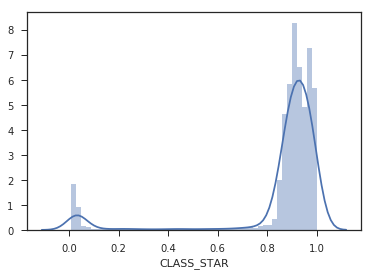

In [18]:
sns.distplot(qso_kids_sdss['CLASS_STAR'])

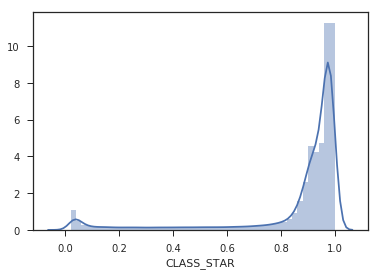

In [38]:
sns.distplot(qso_catalog['CLASS_STAR'])

## Color-color plots

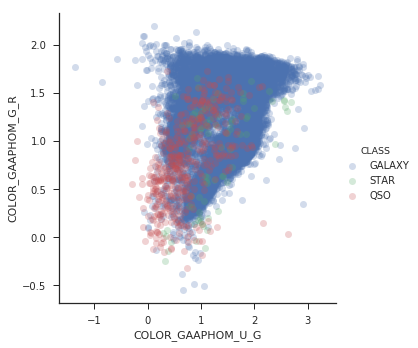

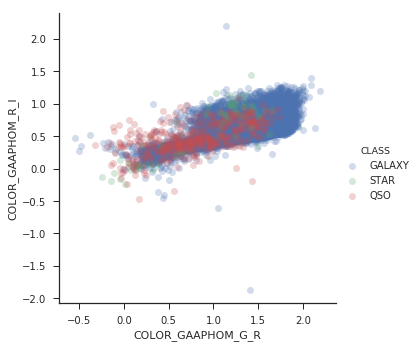

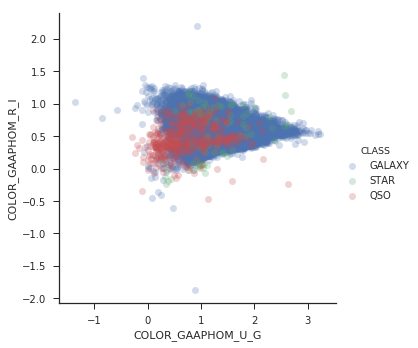

In [39]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

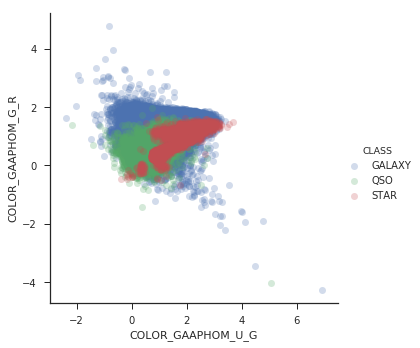

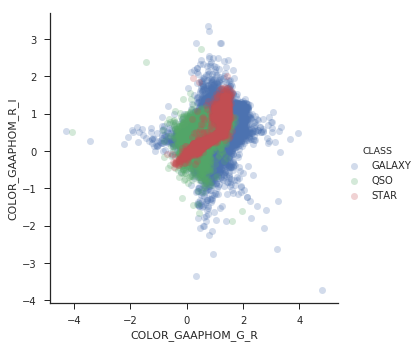

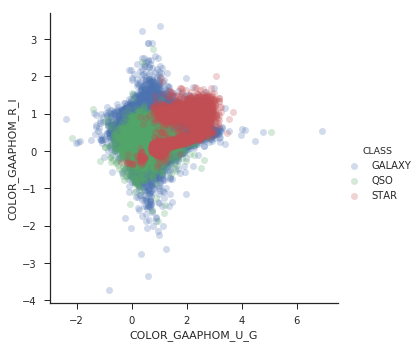

In [40]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

## Other QSO catalogs

In [41]:
qso_catalogs_report(catalog_star)

Catalog size: 1147110
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 10568, 149271, 987271]), array([ 0.92127172, 13.01278866, 86.06593962]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 13944, train elements: 2987
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   84, 12529,  1331]), array([ 0.60240964, 89.85226621,  9.54532415]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 15374, train elements: 3380
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  164, 14246,   964]), array([ 1.06673605, 92.66293743,  6.27032653]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 33385, train elements: 5772
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  536, 27552,  5297]), array([ 1.60551146, 82.52808147, 15.86640707]))


In [42]:
qso_catalogs_report(catalog_non_star)

Catalog size: 1545091
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1525894,   15794,    3403]), array([98.75754891,  1.02220516,  0.22024593]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog size: 19930
Intersection size: 1061, train elements: 48
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([663, 392,   6]), array([62.48821866, 36.9462771 ,  0.56550424]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog size: 22368
Intersection size: 616, train elements: 50
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([279, 334,   3]), array([45.29220779, 54.22077922,  0.48701299]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog size: 70749
Intersection size: 3992, train elements: 127
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2937, 1011,   44]), array([73.57214429, 25.3256513 ,  1.10220441]))
